# Tree Rings Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('Treedata/Ring width and temperature.csv')

In [2]:
# how does the data looks 
#data

In [3]:
# rename the colums with space
data.rename(columns = {'Global tree ring width':'Global_tree_ring_width','CRU temperature':'Temperature','Northern tree ring':'Northern_tree_ring','CRU Northern temperature':'CRU_Northern_temperature','Southern tree ring':'Southern_tree_ring','CRU Southern temperature':'CRU_Southern_temperature'}, inplace=True)

data.columns

Index(['Year', 'Global_tree_ring_width', 'Temperature', 'Northern_tree_ring',
       'CRU_Northern_temperature', 'Southern_tree_ring',
       'CRU_Southern_temperature'],
      dtype='object')

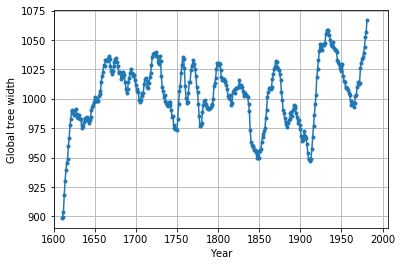

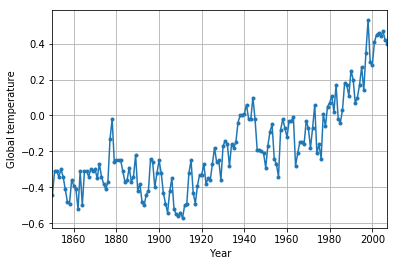

In [4]:
g=data.plot(x='Year', y ='Global_tree_ring_width',legend=False, style=".-"); # global tree ring with vs year 
plt.ylabel('Global tree width');
g.grid()
data1= data.dropna(subset=['Year', 'Temperature'])
gt = data1.plot(x='Year', y ='Temperature', legend= False, style=".-");
plt.ylabel('Global temperature');
gt.grid()

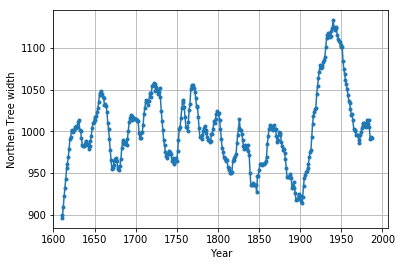

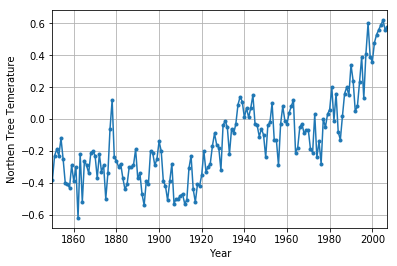

In [5]:
n = data.plot(x ='Year', y='Northern_tree_ring',legend=False, style=".-");
n.grid();
plt.ylabel('Northen Tree width');
datan= data.dropna(subset=['Year', 'CRU_Northern_temperature'])

nt = datan.plot(x='Year', y ='CRU_Northern_temperature',legend=False, style=".-");
plt.ylabel('Northen Tree Temerature');
nt.grid()

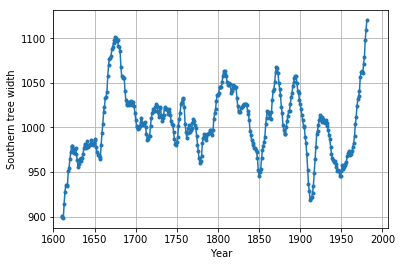

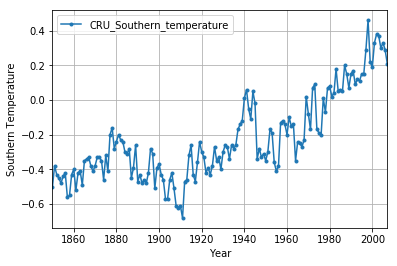

In [6]:
s=data.plot(x ='Year', y='Southern_tree_ring',legend=False,  style=".-");
s.grid()
plt.ylabel('Southern tree width');
datas= data.dropna(subset=['Year', 'CRU_Southern_temperature'])

st= datas.plot(x='Year', y ='CRU_Southern_temperature', style=".-");
plt.ylabel('Southern Temperature');
st.grid()

Testing the correlation 

In [7]:
data1= data.dropna(subset=['Temperature', 'Global_tree_ring_width'])
data2= data.dropna(subset=['CRU_Northern_temperature', 'Northern_tree_ring'])
data3= data.dropna(subset=['CRU_Southern_temperature', 'Southern_tree_ring'])

print(data1['Global_tree_ring_width'].corr(data1.Temperature)) # correlation between Global width and Temperature  
print(data2['Northern_tree_ring'].corr(data1.CRU_Northern_temperature))# correlation between Northern with and Northern Temp
print(data3['Southern_tree_ring'].corr(data1.CRU_Southern_temperature))# correlation between Southern with and Southern Temp

0.604897414159
0.575903469915
0.174626844877


 Modelling the data for global tree ring width with linear regression 

In [8]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

In [9]:
Dlistx = data1.Global_tree_ring_width.tolist()
Dlisty = data1.Temperature.tolist()
x = np.asarray(Dlistx)

X=x[:, np.newaxis]

#plt.plot(Dlistx, Dlisty, 'o');
#plt.ylabel('Global_temperature');
#plt.xlabel('tree_ring_width ');

In [10]:
model = LinearRegression(normalize=True)
print(model.normalize)

True


In [11]:
model.fit(X,Dlisty)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

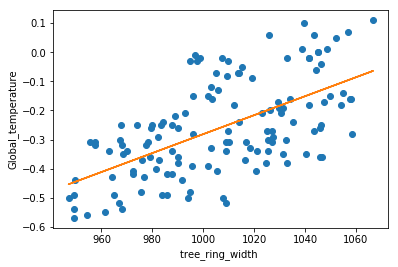

In [12]:
y_fit = model.predict(X) # we predict the model 
plt.plot(Dlistx, Dlisty, 'o'); 
plt.plot(X,y_fit);
plt.ylabel('Global_temperature');
plt.xlabel('tree_ring_width ');

In [13]:
print(model.coef_)
print(model.intercept_)

[ 0.00325884]
-3.54033779359


In [14]:
yresid = data1.Temperature - y_fit # residual 
SSresid = sum (pow(yresid,2))
SStotal = len(data1.Temperature)*np.var (data1.Temperature)
rsq = 1- SSresid/SStotal
print (rsq)

0.365900881657


MODELLING THE NORTHEN TREE RING 

In [15]:
Dlistx = data1.Northern_tree_ring.tolist()
Dlisty = data1.CRU_Northern_temperature.tolist()

x = np.asarray(Dlistx)

X=x[:, np.newaxis]

#plt.plot(Dlistx, Dlisty, 'o');
#plt.ylabel('Northen temperature');
#plt.xlabel('Northen tree ring width ');

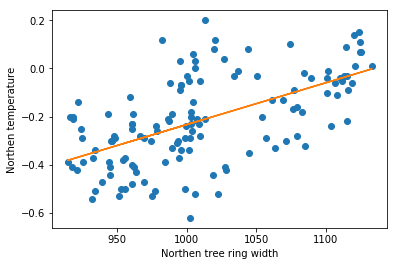

In [16]:
model.fit(X,Dlisty)
y_fit = model.predict(X) # we predict the model 
plt.plot(Dlistx, Dlisty, 'o'); 
plt.plot(X,y_fit);
plt.ylabel('Northen temperature');
plt.xlabel('Northen tree ring width');

In [17]:
print(model.coef_)
print(model.intercept_)


[ 0.00173341]
-1.96624701937


In [18]:
yresid = data1.Temperature - y_fit # residual 
SSresid = sum (pow(yresid,2))
SStotal = len(data1.Temperature)*np.var (data1.Temperature)
rsq = 1- SSresid/SStotal
print (rsq)

0.199603610257


 MODELLING THE SOUTHERN TREE RING 


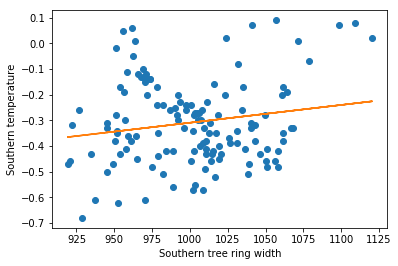

In [19]:
Dlistx = data1.Southern_tree_ring.tolist()
Dlisty = data1.CRU_Southern_temperature.tolist()

x = np.asarray(Dlistx)

X=x[:, np.newaxis]
model.fit(X,Dlisty)
y_fit = model.predict(X) # we predict the model 
plt.plot(Dlistx, Dlisty, 'o'); 
plt.plot(X,y_fit);
plt.ylabel('Southern temperature');
plt.xlabel('Southern tree ring width');

In [20]:
print(model.coef_)
print(model.intercept_)


[ 0.00069215]
-1.00130450841


In [21]:
yresid = data1.Temperature - y_fit # residual 
SSresid = sum (pow(yresid,2))
SStotal = len(data1.Temperature)*np.var (data1.Temperature)
rsq = 1- SSresid/SStotal
print (rsq)

-0.0865761281716
